In [2]:
from scipy.integrate import odeint  
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Figure 15: MODEL including basal transcription rates

def sdot_toggle_basal(s,t,params):
    # parametres and variables
    M1, M2, P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2, kbm1, kbm2 = params
    
    # define rate ODEs
    rate_M1_production = km1 * ((K2**n2)/(P2**n2 + K2**n2)) + kbm1
    rate_M2_production = km2 * ((K1**n1)/(P1**n1 + K1**n1)) + kbm2
    rate_P1_production = kp1 * M1
    rate_P2_production = kp2 * M2
    rate_M1_loss = -kdm1*M1
    rate_M2_loss = -kdm2*M2
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dM1 = rate_M1_production + rate_M1_loss
    dM2 = rate_M2_production + rate_M2_loss
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dM1, dM2, dP1, dP2]
    return dsdt

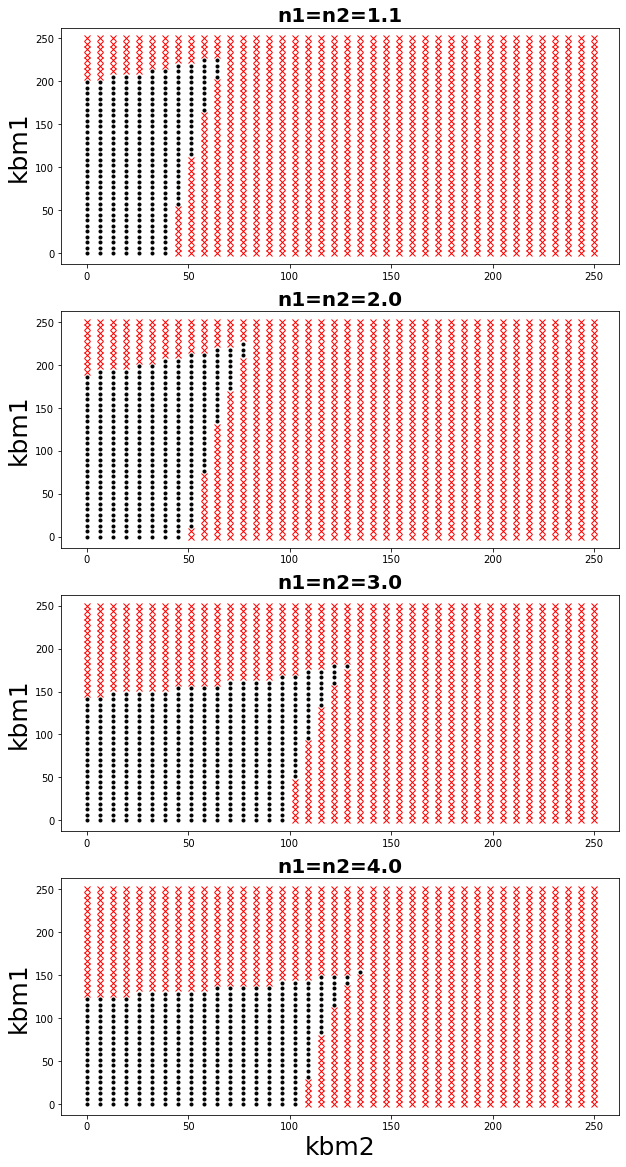

In [17]:
# define default parameter values 
# (rate constants use time units in minutes)

# starting with cooperativity of 4

K1 = 31.94
K2 = 30.00

km1 = 8.30
km2 = 2.06

kdm1 = 0.1386
kdm2 = 0.1386

kp1 = 0.9726
kp2 = 1.170

kdp1 = 0.0165
kdp2 = 0.0165

n1 = 1.9
n2 = 1.9

# define list of observation points 't_obs'
t_start = 0
t_end = 10000
n_obs = 1000
t_obs = np.linspace(t_start, t_end, n_obs)


num_vals = 40
# increase num_vals e.g. to 40 when you have the code working

kbm1_vals = np.linspace(0,250,num_vals)
kbm2_vals = np.linspace(0,250,num_vals)

threshold = 1.0

# make figure that the results will be plotted into
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

# loop over the set of kp1 and kp2 values:
for _kbm1 in kbm1_vals:
    for _kbm2 in kbm2_vals:
        
        # calculate the rates from the values
        # scale the values by division 1000
        kbm1 = _kbm1/1000
        kbm2 = _kbm2/1000
        
        # run simulation starting in
        # P1 state low
        # P2 state high
        
        m1=0
        m2=0
        p1=0
        p2=10000
        s0=(m1,m2,p1,p2)
        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2, kbm1, kbm2)
        s_obs=odeint(sdot_toggle_basal,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,2]
        p2_obs=s_obs[:,3]

        
        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_1 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_1 = "p1_low_p2_high"
        else:
            result_1 = 'p1_p2_similar'
        
        # run simulation starting in
        # P1 state high
        # P2 state low
        
        m1=0
        m2=0
        p1=10000
        p2=0
        s0=(m1,m2,p1,p2)
        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2, kbm1, kbm2)
        s_obs=odeint(sdot_toggle_basal,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,2]
        p2_obs=s_obs[:,3]

        
        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_2 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_2 = "p1_low_p2_high"
        else:
            result_2 = 'p1_p2_similar'

        # if result_1 and result_2 are the same, then both initial states
        # ended in the same final states - no toggle behaviour observed
        # ---> plot a red cross on the bifurcation diagram ax1 at coords (log_kp1, log_kp2)
        #
        # if result_1 and result_2 are different then the different initial states
        # end in different final states - toggle behaviour has been observed
        # ---> plot a black point on the bifurcation diagram ax1 at coords (log_kp1, log_kp2)
    
        if result_1 == result_2:
            ax1.plot(_kbm1, _kbm2,'rx')
        if result_1 != result_2:
            ax1.plot(_kbm1, _kbm2,'k.')

n1 = 2.0
n2 = 2.0

for _kbm1 in kbm1_vals:
    for _kbm2 in kbm2_vals:
        
        # calculate the rates from the values
        # scale the values by division 1000
        kbm1 = _kbm1/1000
        kbm2 = _kbm2/1000
        
        # run simulation starting in
        # P1 state low
        # P2 state high
        
        m1=0
        m2=0
        p1=0
        p2=10000
        s0=(m1,m2,p1,p2)
        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2, kbm1, kbm2)
        s_obs=odeint(sdot_toggle_basal,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,2]
        p2_obs=s_obs[:,3]

        
        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_1 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_1 = "p1_low_p2_high"
        else:
            result_1 = 'p1_p2_similar'
        
        # run simulation starting in
        # P1 state high
        # P2 state low
        
        m1=0
        m2=0
        p1=10000
        p2=0
        s0=(m1,m2,p1,p2)
        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2, kbm1, kbm2)
        s_obs=odeint(sdot_toggle_basal,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,2]
        p2_obs=s_obs[:,3]

        
        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_2 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_2 = "p1_low_p2_high"
        else:
            result_2 = 'p1_p2_similar'

        # if result_1 and result_2 are the same, then both initial states
        # ended in the same final states - no toggle behaviour observed
        # ---> plot a red cross on the bifurcation diagram ax1 at coords (log_kp1, log_kp2)
        #
        # if result_1 and result_2 are different then the different initial states
        # end in different final states - toggle behaviour has been observed
        # ---> plot a black point on the bifurcation diagram ax1 at coords (log_kp1, log_kp2)
    
        if result_1 == result_2:
            ax2.plot(_kbm1, _kbm2,'rx')
        if result_1 != result_2:
            ax2.plot(_kbm1, _kbm2,'k.')

n1 = 3.0
n2 = 3.0

for _kbm1 in kbm1_vals:
    for _kbm2 in kbm2_vals:
        
        # calculate the rates from the values
        # scale the values by division 1000
        kbm1 = _kbm1/1000
        kbm2 = _kbm2/1000
        
        # run simulation starting in
        # P1 state low
        # P2 state high
        
        m1=0
        m2=0
        p1=0
        p2=10000
        s0=(m1,m2,p1,p2)
        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2, kbm1, kbm2)
        s_obs=odeint(sdot_toggle_basal,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,2]
        p2_obs=s_obs[:,3]

        
        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_1 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_1 = "p1_low_p2_high"
        else:
            result_1 = 'p1_p2_similar'
        
        # run simulation starting in
        # P1 state high
        # P2 state low
        
        m1=0
        m2=0
        p1=10000
        p2=0
        s0=(m1,m2,p1,p2)
        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2, kbm1, kbm2)
        s_obs=odeint(sdot_toggle_basal,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,2]
        p2_obs=s_obs[:,3]

        
        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_2 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_2 = "p1_low_p2_high"
        else:
            result_2 = 'p1_p2_similar'

        # if result_1 and result_2 are the same, then both initial states
        # ended in the same final states - no toggle behaviour observed
        # ---> plot a red cross on the bifurcation diagram ax1 at coords (log_kp1, log_kp2)
        #
        # if result_1 and result_2 are different then the different initial states
        # end in different final states - toggle behaviour has been observed
        # ---> plot a black point on the bifurcation diagram ax1 at coords (log_kp1, log_kp2)
    
        if result_1 == result_2:
            ax3.plot(_kbm1, _kbm2,'rx')
        if result_1 != result_2:
            ax3.plot(_kbm1, _kbm2,'k.')
n1 = 4.0
n2 = 4.0

for _kbm1 in kbm1_vals:
    for _kbm2 in kbm2_vals:
        
        # calculate the rates from the values
        # scale the values by division 1000
        kbm1 = _kbm1/1000
        kbm2 = _kbm2/1000
        
        # run simulation starting in
        # P1 state low
        # P2 state high
        
        m1=0
        m2=0
        p1=0
        p2=10000
        s0=(m1,m2,p1,p2)
        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2, kbm1, kbm2)
        s_obs=odeint(sdot_toggle_basal,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,2]
        p2_obs=s_obs[:,3]

        
        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_1 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_1 = "p1_low_p2_high"
        else:
            result_1 = 'p1_p2_similar'
        
        # run simulation starting in
        # P1 state high
        # P2 state low
        
        m1=0
        m2=0
        p1=10000
        p2=0
        s0=(m1,m2,p1,p2)
        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, km1, km2, kdm1, kdm2, kbm1, kbm2)
        s_obs=odeint(sdot_toggle_basal,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,2]
        p2_obs=s_obs[:,3]

        
        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_2 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_2 = "p1_low_p2_high"
        else:
            result_2 = 'p1_p2_similar'

        # if result_1 and result_2 are the same, then both initial states
        # ended in the same final states - no toggle behaviour observed
        # ---> plot a red cross on the bifurcation diagram ax1 at coords (log_kp1, log_kp2)
        #
        # if result_1 and result_2 are different then the different initial states
        # end in different final states - toggle behaviour has been observed
        # ---> plot a black point on the bifurcation diagram ax1 at coords (log_kp1, log_kp2)
    
        if result_1 == result_2:
            ax4.plot(_kbm1, _kbm2,'rx')
        if result_1 != result_2:
            ax4.plot(_kbm1, _kbm2,'k.')

# set title and labels for plots
ax1.set_title('n1=n2=1.1', fontsize=20, fontweight='bold')
ax2.set_title('n1=n2=2.0', fontsize=20, fontweight='bold')
ax3.set_title('n1=n2=3.0', fontsize=20, fontweight='bold')
ax4.set_title('n1=n2=4.0', fontsize=20, fontweight='bold')

ax1.set_ylabel('kbm1')
ax2.set_ylabel('kbm1')
ax3.set_ylabel('kbm1')
ax4.set_ylabel('kbm1')
ax4.set_xlabel('kbm2')

ax1.xaxis.label.set_size(25)
ax1.yaxis.label.set_size(25)
ax2.xaxis.label.set_size(25)
ax2.yaxis.label.set_size(25)
ax3.xaxis.label.set_size(25)
ax3.yaxis.label.set_size(25)
ax4.xaxis.label.set_size(25)
ax4.yaxis.label.set_size(25)

plt.savefig('fig15.png');